# Tips for choosing profile locations

To help you pick the locations of your profiles, here are a few resources.

## EPSG:3031 Polar Stereographic map 
Read x/y coordinates off this map to choose approximate start/end profile points.

begin [ERROR]: Failed to remove gmt_18.ps-! [remove error: Permission denied]
begin [WARNING]: Unable to remove gmt_18.ps- [permissions?]
begin [ERROR]: Failed to remove psconvert_6096c.bb! [remove error: Permission denied]
begin [WARNING]: Unable to remove psconvert_6096c.bb [permissions?]
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
coast [WARNING]: For a UTM or TM projection, your region -2700000/2700000/-2700000/2700000 is too large to be in degrees and thus assumed to be in meters
coast [WARNING]: For a UTM or TM projection, your region -2700000/2700000/-2700000/2700000 is too large to be in degrees and thus assumed to be in meters


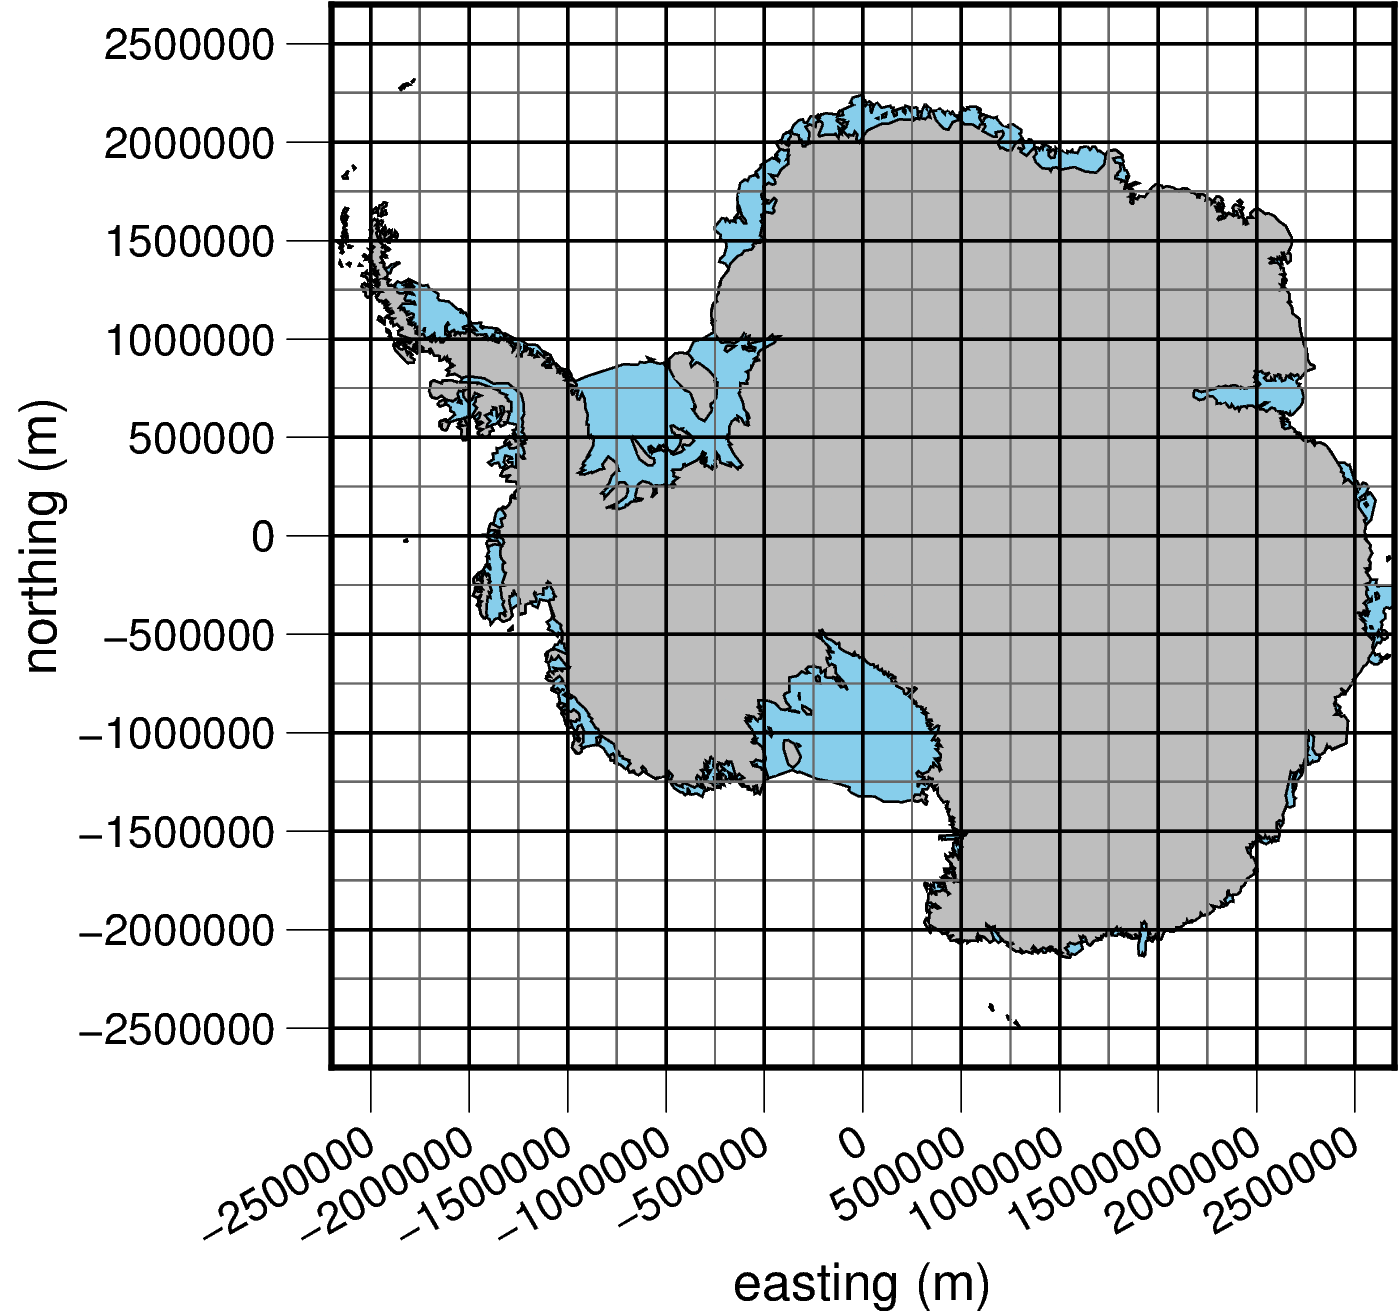

In [1]:
import pygmt
import antarctic_plots.fetch as fetch

fig = pygmt.Figure()
region = (-2700000, 2700000, -2700000, 2700000)
e, w, n, s = region
fig_height = 90  # in mm
fig_width = fig_height * (w - e) / (s - n)
fig_ratio = (s - n) / (fig_height / 1000)
fig_proj = "x1:" + str(fig_ratio)
fig_proj_ll = "s0/-90/-71/1:" + str(fig_ratio)

fig.coast(
    region=region, projection=fig_proj_ll, shorelines="0.5p,black", land="skyblue"
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)

with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa500000g500000+a30+leasting (m)",
            "pxg250000",
            "sya500000g500000+lnorthing (m)",
            "pyg250000",
        ],
    )
fig.show()

## Make custom shapefile in QGIS

QGIS, especially with the [Quantarctica package](https://www.npolar.no/quantarctica/#toggle-id-2), is an easy way to make a custom shapefile. This can then be used with `antarctic_plots` to sample data along the file. 

To make the shapefile:
*  Layer -> Create Layer -> New Shapefile Layer
* For `Geometry Type`, select `Polygon`
* Select `EPSG:3031` for the coordinate reference system
* save to the same directory as your python file you want to work with.
